In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [25]:
#dm = pd.read_csv('MatrixDistance/matrixDistance.csv',index_col = 0)
dm = pd.read_csv('distanceMatrixFromTree.csv',sep=';')
lineage = pd.read_csv('lineages.csv',sep='\t', index_col = 0)

In [26]:
dm = dm.set_index('ID')


In [31]:
X = pd.read_csv('gene_oneHotEncoding.csv', index_col = 0)
X

,group_1034,cysNC,group_1277,group_1352,group_1405,group_1784,group_2013,group_2063,folP,group_340,...,group_3840,group_3841,group_3842,group_3843,group_3844,group_3845,group_3846,group_3847,group_3848,lineage
2855,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
13685,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
27228,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31457,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31458,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
61380,0,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
61381,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,0,0,0


In [4]:
dm = dm.rename(index=lambda x: x.split('_')[0])

In [5]:
#dm = dm.sort_index(axis= 0, ascending = True)


In [6]:
lineage = lineage.set_index(dm.index)


In [7]:
dm.columns = dm.index.to_list()


In [8]:
dmlin = dm.join(lineage)
dmlin

,31597,31596,31486,31474,31633,31485,31473,31628,61342,31560,...,31952,31733,31642,31501,31867,31488,31475,31603,13685,lineage
ID,,,,,,,,,,,,,,,,,,,,,
31597,0.00000,0.00463,0.01491,0.01489,0.01754,0.01699,0.01696,0.01517,0.01253,0.03309,...,0.07109,0.02765,0.01792,0.01792,0.01782,0.01856,0.01861,0.01671,0.01555,1
31596,0.00463,0.00000,0.01080,0.01078,0.01343,0.01288,0.01286,0.01106,0.00843,0.02899,...,0.06698,0.02354,0.01381,0.01381,0.01372,0.01445,0.01451,0.01261,0.01144,1
31486,0.01491,0.01080,0.00000,0.00173,0.00462,0.00407,0.00405,0.00225,0.00259,0.02365,...,0.06164,0.01820,0.00876,0.00876,0.00866,0.00939,0.00945,0.00755,0.00638,1
31474,0.01489,0.01078,0.00173,0.00000,0.00460,0.00405,0.00403,0.00223,0.00257,0.02362,...,0.06162,0.01818,0.00874,0.00874,0.00864,0.00937,0.00943,0.00753,0.00636,1
31633,0.01754,0.01343,0.00462,0.00460,0.00000,0.00670,0.00668,0.00488,0.00522,0.02627,...,0.06427,0.02083,0.01138,0.01138,0.01129,0.01202,0.01208,0.01018,0.00901,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31867,0.01782,0.01372,0.00866,0.00864,0.01129,0.01074,0.01071,0.00892,0.00628,0.02684,...,0.06484,0.02140,0.00010,0.00010,0.00000,0.00547,0.00553,0.00838,0.00890,0
31488,0.01856,0.01445,0.00939,0.00937,0.01202,0.01147,0.01145,0.00965,0.00702,0.02758,...,0.06557,0.02213,0.00557,0.00557,0.00547,0.00000,0.00593,0.00912,0.00963,0
31475,0.01861,0.01451,0.00945,0.00943,0.01208,0.01153,0.01150,0.00971,0.00707,0.02763,...,0.06563,0.02219,0.00562,0.00562,0.00553,0.00593,0.00000,0.00917,0.00969,0


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dmlin, test_size = 0.2)
train.head()

,31597,31596,31486,31474,31633,31485,31473,31628,61342,31560,...,31952,31733,31642,31501,31867,31488,31475,31603,13685,lineage
ID,,,,,,,,,,,,,,,,,,,,,
31953,0.13923,0.13512,0.12978,0.12976,0.13240,0.13186,0.13183,0.13003,0.12740,0.14705,...,0.12605,0.12803,0.13307,0.13307,0.13298,0.13371,0.13376,0.13187,0.13070,1
31470,0.20155,0.19744,0.19210,0.19208,0.19472,0.19418,0.19415,0.19235,0.18972,0.20937,...,0.18837,0.19035,0.19539,0.19539,0.19529,0.19603,0.19608,0.19418,0.19302,0
31578,0.14934,0.14524,0.13989,0.13987,0.14252,0.14197,0.14195,0.14015,0.13752,0.15716,...,0.13617,0.13814,0.14319,0.14319,0.14309,0.14383,0.14388,0.14198,0.14082,1
13685,0.01555,0.01144,0.00638,0.00636,0.00901,0.00846,0.00844,0.00664,0.00401,0.02457,...,0.06256,0.01912,0.00900,0.00900,0.00890,0.00963,0.00969,0.00779,0.00000,0
31813,0.17268,0.16858,0.16323,0.16321,0.16586,0.16531,0.16529,0.16349,0.16086,0.18051,...,0.15951,0.16148,0.16653,0.16653,0.16643,0.16717,0.16722,0.16532,0.16416,0


In [10]:
X_train = train.iloc[:,:-1].to_numpy()
X_test = test.iloc[:,:-1].to_numpy()

In [12]:
y_train = train['lineage'].to_numpy()

y_test = test['lineage'].to_numpy()

In [13]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=3)

In [14]:
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[18,  6],
       [ 1, 59]])

In [15]:
neigh.score(X_test, y_test, sample_weight=None)

0.9166666666666666

In [16]:
#Cross Validation KNN
from sklearn.model_selection import cross_val_score
#Cross Validation
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

Xf = dmlin.iloc[:,:-1].to_numpy()
yf= dmlin['lineage'].to_numpy()
#Cross Validation
scores = cross_val_score(neigh, Xf, yf, cv=cv,scoring='accuracy')
scores.mean()

0.9594076655052264

In [17]:
#SVM
linear_svc = SVC(kernel='rbf')
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)


array([[16,  8],
       [ 1, 59]])

In [18]:
metrics.accuracy_score(y_test, y_pred)

0.8928571428571429

In [19]:
#Cross Validation SVM
from sklearn.model_selection import cross_val_score

Xf = dmlin.iloc[:,:-1].to_numpy()
yf= dmlin['lineage'].to_numpy()
#Cross Validation
scores = cross_val_score(linear_svc, Xf, yf, cv=cv,scoring='accuracy')
scores.mean()

0.9308362369337979

In [20]:
#Cross Validation Logistic Regression
from sklearn.model_selection import cross_val_score
lg = LogisticRegression(penalty ='l2')
Xf = dmlin.iloc[:,:-1].to_numpy()
yf= dmlin['lineage'].to_numpy()
#Cross Validation
scores = cross_val_score(lg, Xf, yf, cv=cv,scoring='accuracy')
scores.mean()

0.8760162601626016

In [21]:
gene = pd.read_csv('geneRankedSVM_normalized.csv')
scoary_gene = pd.read_csv('ScoaryFirst280.csv')
gene = gene.set_index('Unnamed: 0')
scoary_gene = scoary_gene.set_index('Unnamed: 0')

In [22]:
scoary_gene_filt =scoary_gene.filter(gene.columns)

In [23]:
scoary_gene_filt
#gene = gene.drop(columns=['lineage'])

,group_966,group_1866,group_625,group_1710,group_1856,tbpB_2,group_2005,group_606,group_636,group_829,...,group_2104,group_2316,group_20,group_53,group_1163,group_2383,group_887,group_2414,group_181,group_1528
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2855,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,1,1,0,1,1,0
13685,0,1,0,1,1,1,1,0,0,1,...,1,0,0,1,1,0,1,0,0,0
27228,0,1,0,1,1,1,0,1,0,1,...,1,1,0,1,1,1,1,0,1,0
31457,0,1,0,0,1,1,0,0,0,1,...,1,0,0,1,1,1,0,1,1,0
31458,0,1,0,1,1,0,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,0,1,0,1,1,0,0,0,0,1,...,1,1,0,1,1,0,1,0,0,0
61380,0,1,0,0,1,1,1,1,1,1,...,1,1,0,1,1,1,0,0,0,0
61381,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [24]:
gene = gene.div(gene.sum(axis=1), axis=0)
scoary_gene_filt = scoary_gene_filt.div(scoary_gene_filt.sum(axis=1), axis=0)
scoary_gene_filt

,group_966,group_1866,group_625,group_1710,group_1856,tbpB_2,group_2005,group_606,group_636,group_829,...,group_2104,group_2316,group_20,group_53,group_1163,group_2383,group_887,group_2414,group_181,group_1528
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2855,0.0,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,...,0.090909,0.090909,0.0,0.000000,0.090909,0.090909,0.000000,0.090909,0.090909,0.000000
13685,0.0,0.071429,0.0,0.071429,0.071429,0.071429,0.071429,0.000000,0.000000,0.071429,...,0.071429,0.000000,0.0,0.071429,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000
27228,0.0,0.062500,0.0,0.062500,0.062500,0.062500,0.000000,0.062500,0.000000,0.062500,...,0.062500,0.062500,0.0,0.062500,0.062500,0.062500,0.062500,0.000000,0.062500,0.000000
31457,0.0,0.066667,0.0,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.066667,...,0.066667,0.000000,0.0,0.066667,0.066667,0.066667,0.000000,0.066667,0.066667,0.000000
31458,0.0,0.076923,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.076923,0.000000,0.0,0.076923,0.076923,0.000000,0.076923,0.000000,0.076923,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,0.0,0.076923,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.076923,0.076923,0.0,0.076923,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000
61380,0.0,0.066667,0.0,0.000000,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,0.066667,0.066667,0.0,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000
61381,0.0,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,...,0.125000,0.000000,0.0,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000


In [25]:
gene.index.name = 'ID' 

In [26]:
gene = gene.set_index(dm.index)
scoary_gene_filt = scoary_gene_filt.set_index(dm.index)

In [27]:
X = gene.join(dmlin)
Xscoary = scoary_gene_filt.join(dmlin)

In [28]:
trainf, testf = train_test_split(X, test_size = 0.2)
X_trainf = trainf.iloc[:,:-1].to_numpy()


X_testf = testf.iloc[:,:-1].to_numpy()


y_trainf = trainf['lineage'].to_numpy()
y_testf = testf['lineage'].to_numpy()

In [29]:
#SVM train con le feature selezionate
svc = SVC(kernel='rbf')
svc.fit(X_trainf, y_trainf)

y_predf = svc.predict(X_testf)
metrics.confusion_matrix(y_testf, y_predf)


array([[23,  5],
       [ 2, 54]])

In [30]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [31]:
metrics.accuracy_score(y_testf, y_predf)

0.9166666666666666

In [32]:
#Logistic Regression
lr = LogisticRegression(penalty ='l2').fit(X_trainf, y_trainf)
y_predf = lr.predict(X_testf)
metrics.confusion_matrix(y_testf, y_predf)

array([[19,  9],
       [ 2, 54]])

In [33]:
metrics.accuracy_score(y_testf, y_predf)

0.8690476190476191

In [34]:
listA = dmlin[dmlin['lineage']==1]
listB = dmlin[dmlin['lineage']==0]

In [11]:
#Hierarchical clustring on distanceMatrix dm
from sklearn.cluster import AgglomerativeClustering

In [12]:
dm.head()

,31597,31596,31486,31474,31633,31485,31473,31628,61342,31560,...,31522,31952,31733,31642,31501,31867,31488,31475,31603,13685
ID,,,,,,,,,,,,,,,,,,,,,
31597,0.00000,0.00463,0.01491,0.01489,0.01754,0.01699,0.01696,0.01517,0.01253,0.03309,...,0.07050,0.07109,0.02765,0.01792,0.01792,0.01782,0.01856,0.01861,0.01671,0.01555
31596,0.00463,0.00000,0.01080,0.01078,0.01343,0.01288,0.01286,0.01106,0.00843,0.02899,...,0.06640,0.06698,0.02354,0.01381,0.01381,0.01372,0.01445,0.01451,0.01261,0.01144
31486,0.01491,0.01080,0.00000,0.00173,0.00462,0.00407,0.00405,0.00225,0.00259,0.02365,...,0.06105,0.06164,0.01820,0.00876,0.00876,0.00866,0.00939,0.00945,0.00755,0.00638
31474,0.01489,0.01078,0.00173,0.00000,0.00460,0.00405,0.00403,0.00223,0.00257,0.02362,...,0.06103,0.06162,0.01818,0.00874,0.00874,0.00864,0.00937,0.00943,0.00753,0.00636
31633,0.01754,0.01343,0.00462,0.00460,0.00000,0.00670,0.00668,0.00488,0.00522,0.02627,...,0.06368,0.06427,0.02083,0.01138,0.01138,0.01129,0.01202,0.01208,0.01018,0.00901


In [13]:
dm.to_numpy()

array([[0.     , 0.00463, 0.01491, ..., 0.01861, 0.01671, 0.01555],
       [0.00463, 0.     , 0.0108 , ..., 0.01451, 0.01261, 0.01144],
       [0.01491, 0.0108 , 0.     , ..., 0.00945, 0.00755, 0.00638],
       ...,
       [0.01861, 0.01451, 0.00945, ..., 0.     , 0.00917, 0.00969],
       [0.01671, 0.01261, 0.00755, ..., 0.00917, 0.     , 0.00779],
       [0.01555, 0.01144, 0.00638, ..., 0.00969, 0.00779, 0.     ]])

In [14]:
clustering = AgglomerativeClustering( linkage="average",compute_distances=True).fit(dm)

/home/lf481323/.conda/envs/torchGeoM/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [27]:
import seaborn as sns
sns.set_theme(color_codes=True)

In [28]:
lin_list = lineage['lineage'].to_list()

In [29]:
lut = dict(zip(lineage['lineage'].unique(), "rbg"))
row_colors =  lineage['lineage'].map(lut)

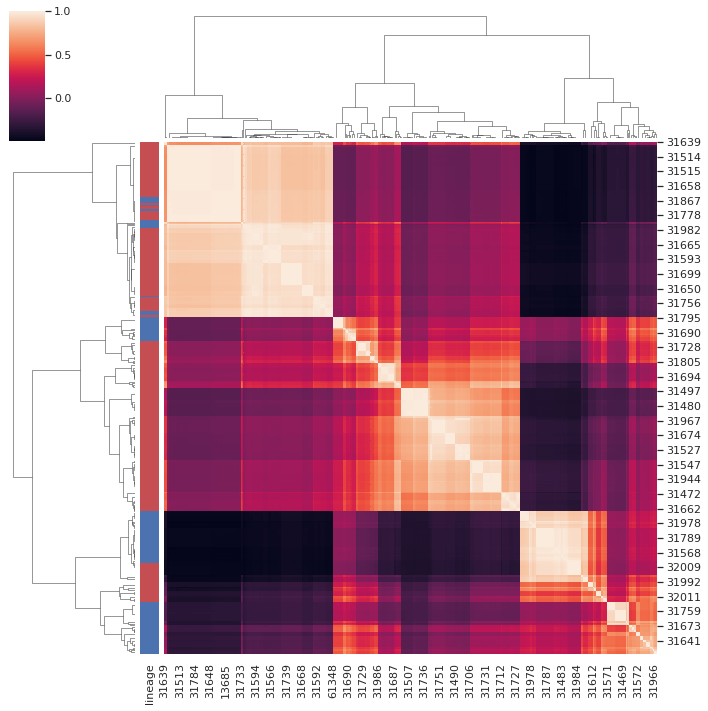

In [41]:
from scipy.cluster import hierarchy
from scipy.spatial import distance
correlations = dm.corr()
correlations_array = np.asarray(dm.corr())

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, row_colors=row_colors, method="average",
figsize=(10, 10))

In [42]:
hierarchy.fcluster(row_linkage. t = 0.8)

SyntaxError: keyword can't be an expression (<ipython-input-42-2ed632bf598b>, line 1)

In [ ]:
import scipy.spatial.distance as ssd
distArray = ssd.squareform(dm) 

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 2, linkage="average", affinity= 'euclidean')
clusterpred = clustering.fit_predict(distArray.reshape(-1, 1))

In [43]:
print(cluster.labels_)

NameError: name 'cluster' is not defined

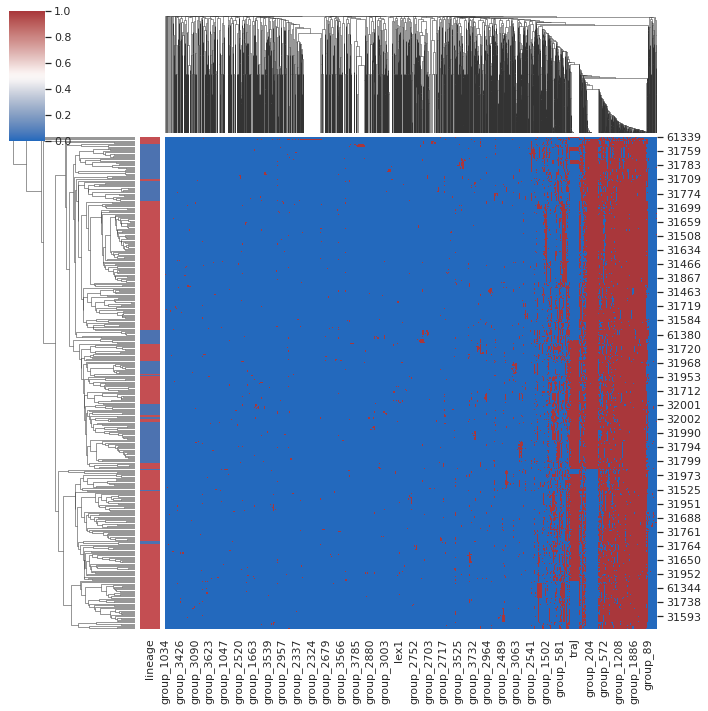

In [35]:
#metric="correlation"
g = sns.clustermap(X, row_colors=row_colors, metric="jaccard",cmap="vlag")

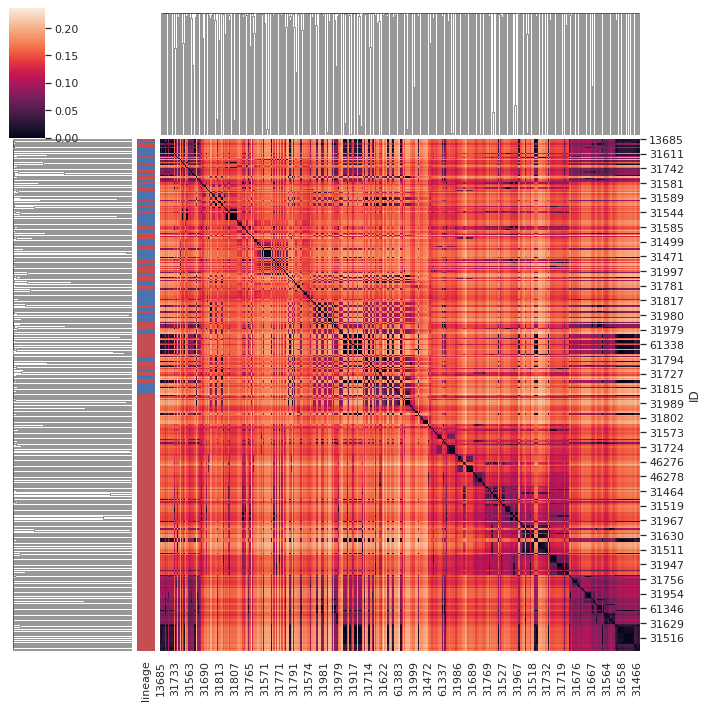

In [18]:
#metric="chebyshev"
g = sns.clustermap(dm, row_colors=row_colors,metric="hamming")

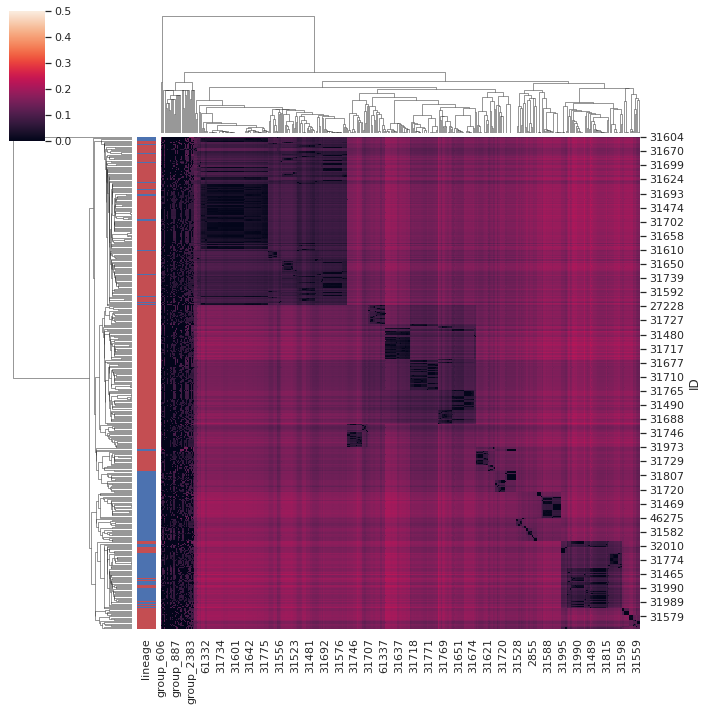

In [45]:
# hierachical clustering gene + distance - metric="chebyshev"
g = sns.clustermap( Xscoary.iloc[:,:-1], row_colors=row_colors,metric="chebyshev")

In [46]:
# Scoary filtering
Xscoary

,group_966,group_1866,group_625,group_1710,group_1856,tbpB_2,group_2005,group_606,group_636,group_829,...,31952,31733,31642,31501,31867,31488,31475,31603,13685,lineage
ID,,,,,,,,,,,,,,,,,,,,,
31597,0.0,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,...,0.07109,0.02765,0.01792,0.01792,0.01782,0.01856,0.01861,0.01671,0.01555,1
31596,0.0,0.071429,0.0,0.071429,0.071429,0.071429,0.071429,0.000000,0.000000,0.071429,...,0.06698,0.02354,0.01381,0.01381,0.01372,0.01445,0.01451,0.01261,0.01144,1
31486,0.0,0.062500,0.0,0.062500,0.062500,0.062500,0.000000,0.062500,0.000000,0.062500,...,0.06164,0.01820,0.00876,0.00876,0.00866,0.00939,0.00945,0.00755,0.00638,1
31474,0.0,0.066667,0.0,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.066667,...,0.06162,0.01818,0.00874,0.00874,0.00864,0.00937,0.00943,0.00753,0.00636,1
31633,0.0,0.076923,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.06427,0.02083,0.01138,0.01138,0.01129,0.01202,0.01208,0.01018,0.00901,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31867,0.0,0.076923,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.06484,0.02140,0.00010,0.00010,0.00000,0.00547,0.00553,0.00838,0.00890,0
31488,0.0,0.066667,0.0,0.000000,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,0.06557,0.02213,0.00557,0.00557,0.00547,0.00000,0.00593,0.00912,0.00963,0
31475,0.0,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,...,0.06563,0.02219,0.00562,0.00562,0.00553,0.00593,0.00000,0.00917,0.00969,0


In [47]:
trainf, testf = train_test_split(Xscoary, test_size = 0.2)
X_trainf = trainf.iloc[:,:-1].to_numpy()


X_testf = testf.iloc[:,:-1].to_numpy()


y_trainf = trainf['lineage'].to_numpy()
y_testf = testf['lineage'].to_numpy()

In [48]:
#SVM train con le feature selezionate
svc = SVC(kernel='rbf')
svm = svc.fit(X_trainf, y_trainf)

y_predf = svm.predict(X_testf)
metrics.confusion_matrix(y_testf, y_predf)


array([[24,  5],
       [ 1, 54]])

In [49]:
metrics.accuracy_score(y_testf, y_predf)

0.9285714285714286

In [50]:
Xf = Xscoary.iloc[:,:-1].to_numpy()
yf= Xscoary['lineage'].to_numpy()
scores = cross_val_score(svc, Xf, yf, cv=cv)
scores.mean()

0.9308943089430894

In [51]:
scores

array([0.95238095, 0.9047619 , 0.92857143, 0.88095238, 0.92857143,
       0.9047619 , 0.97619048, 0.97619048, 0.88095238, 0.97560976])

In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression(penalty ='l2')
lr = lgmodel.fit(X_trainf, y_trainf)
y_predf = lr.predict(X_testf)
metrics.confusion_matrix(y_testf, y_predf)

array([[18, 11],
       [ 1, 54]])

In [53]:
metrics.accuracy_score(y_testf, y_predf)

0.8571428571428571

In [54]:
y_score = lr.predict_proba(X_testf)[:, 1]
metrics.roc_auc_score(y_predf, y_score)

1.0

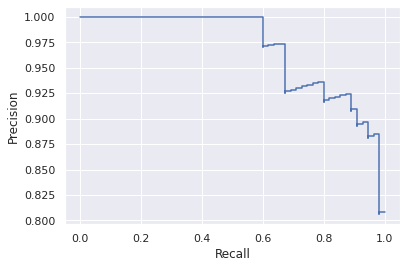

In [55]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
precision, recall, thresholds = precision_recall_curve(y_testf, y_score)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [56]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgmodel, Xf, yf, cv=cv)
scores.mean()

0.8999419279907084

In [57]:
scores

array([0.92857143, 0.88095238, 0.88095238, 0.85714286, 0.80952381,
       0.88095238, 0.95238095, 0.97619048, 0.85714286, 0.97560976])

In [58]:
#KNN
neigh = KNeighborsClassifier(n_neighbors=3)
knn = neigh.fit(X_trainf, y_trainf)
y_predf = neigh.predict(X_testf)
metrics.confusion_matrix(y_testf, y_predf)

array([[24,  5],
       [ 1, 54]])

In [59]:
metrics.accuracy_score(y_testf, y_predf)

0.9285714285714286

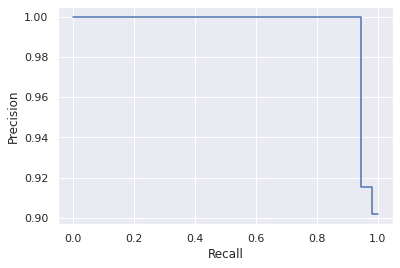

In [60]:
scores = knn.predict_proba(X_testf)[:, 1]

metrics.roc_auc_score(y_predf, scores)
precision, recall, thresholds = precision_recall_curve(y_testf, scores)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [61]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh, Xf, yf, cv=cv,scoring='accuracy')
scores.mean()

0.9666085946573751

In [62]:
scores

array([0.95238095, 0.92857143, 0.97619048, 0.97619048, 0.97619048,
       0.95238095, 0.97619048, 1.        , 0.95238095, 0.97560976])